<a href="https://colab.research.google.com/github/karinadw/Natural-language-Processing---Imperial-College-London/blob/main/CW_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment

In [1]:
! pip install torch

In [2]:
!pip install transformers
!pip install sentencepiece
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [41]:
import torch
import transformers
import torch.nn as nn
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 

from transformers import Trainer, TrainingArguments
from transformers import BertTokenizer
from transformers import BertPreTrainedModel, BertModel

import pandas as pd
import numpy as np
import os

from sklearn.metrics import classification_report

if not torch.cuda.is_available():
  print('WARNING: You may want to change the runtime to GPU for faster training!')
  DEVICE = 'cpu'
else:
  DEVICE = 'cuda:0'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/MyDrive/Colab Notebooks/'
%mkdir './CW'
%cd './CW' 

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/CW


In [12]:
from google.colab import files
uploaded = files.upload()

Saving dontpatronizeme_pcl.tsv to dontpatronizeme_pcl (1).tsv


In [31]:
import io
data = pd.read_csv(io.BytesIO(uploaded['dontpatronizeme_pcl.tsv']), delimiter='\t', skiprows=3)

ValueError: ignored

In [48]:
data

,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism .",0
0,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
1,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
2,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
3,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0
4,6,@@9382277,in-need,in,"To bring down high blood sugar levels , insuli...",0
...,...,...,...,...,...,...
10463,10465,@@14297363,women,lk,Sri Lankan norms and culture inhibit women fro...,1
10464,10466,@@70091353,vulnerable,ph,He added that the AFP will continue to bank on...,0
10465,10467,@@20282330,in-need,ng,""" She has one huge platform , and information ...",3
10466,10468,@@16753236,hopeless,in,""" Anja Ringgren Loven I ca n't find a word to ...",4


In [36]:
labels = []
labels.append(0)

for i in range(len(data['0'])):

  labels.append(data['0'][i])

In [47]:
labels.shape

AttributeError: ignored

In [39]:
count_0 = labels.count(0)
count_1 = labels.count(1)
count_2 = labels.count(2)
count_3 = labels.count(3)
count_4 = labels.count(4)

In [45]:
print("Label 0 appears ", count_0, "out of ", len(labels) + 1, "times")
print("Label 1 appears ", count_1, "out of ", len(labels) + 1, "times")
print("Label 2 appears ", count_2, "out of ", len(labels) + 1, "times")
print("Label 3 appears ", count_3, "out of ", len(labels) + 1, "times")
print("Label 4 appears ", count_4, "out of ", len(labels) + 1, "times")

Label 0 appears  8529 out of  10470 times
Label 1 appears  947 out of  10470 times
Label 2 appears  144 out of  10470 times
Label 3 appears  458 out of  10470 times
Label 4 appears  391 out of  10470 times


(array([8529.,    0.,  947.,    0.,    0.,  144.,    0.,  458.,    0.,
         391.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

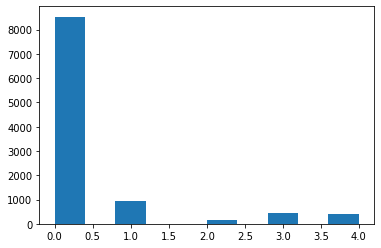

In [43]:
plt.hist(labels)

In [58]:
txt = data["We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism ."]

In [59]:
txt.shape

(10468,)

In [66]:
text = []
text.append("We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism .")

for i in range(len(txt)):
  text.append(data["We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's instructions long ago burned in a fire and imminent catastrophe seems the likeliest outcome . It 's hard to stay that on-edge for that long , though , so it 's natural for people to become inured to this constant chaos , to slump into a malaise of hopelessness and pessimism ."])

In [69]:
text[1]

0        In Libya today , there are countless number of...
1        White House press secretary Sean Spicer said t...
2        Council customers only signs would be displaye...
3        " Just like we received migrants fleeing El Sa...
4        To bring down high blood sugar levels , insuli...
                               ...                        
10463    Sri Lankan norms and culture inhibit women fro...
10464    He added that the AFP will continue to bank on...
10465    " She has one huge platform , and information ...
10466    " Anja Ringgren Loven I ca n't find a word to ...
10467    " Guinness World Record of 540lbs of 7-layer m...
Name: We 're living in times of absolute insanity , as I 'm pretty sure most people are aware . For a while , waking up every day to check the news seemed to carry with it the same feeling of panic and dread that action heroes probably face when they 're trying to decide whether to cut the blue or green wire on a ticking bomb -- except the bomb 's i